###### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#!pip install factor_analyzer

##### Functions

In [4]:
#Below Function converts covid worry related likert scale answers into a combined % score
covidworry_cols=['worriedyourself','worriedothers','worriedphysical','worriedmental']
worrytotal=len(covidworry_cols)*5
def getCovidWorryIndex(row):
    global worrytotal
    worriedyourself=row[0]
    worriedothers=row[1]
    worriedphysical=row[2]
    worriedmental=row[3]
    #print(row)
    return round((worriedyourself+worriedothers+worriedphysical+worriedmental)/worrytotal*100,2)

In [5]:
#Below Function converts mood states/emotions related likert scale answers into a combined % score
priorworry3_cols=['priorworry','priorhappyvssad','priorenjoyactivities','priorrelaxedvsanxious',
         'priorfidget', 'priorfatigue', 'priorfocus', 'priorirritable','priorlonely', 
         'priornegthoughts']

moodtotal=len(priorworry3_cols)*5
def getMoodStateIndex(row):
    global moodtotal
    priorworry=row[0]
    priorhappyvssad=row[1]
    priorenjoyactivities=row[2]
    priorrelaxedvsanxious=row[3]
    priorfidget=row[4]
    priorfatigue=row[5]
    priorfocus=row[6]
    priorirritable=row[7]
    priorlonely=row[8]
    priornegthoughts=row[9]
    
    #Flipping scales to have the same order in all the cases i.e. positive to negative
    if priorhappyvssad==1:
        priorhappyvssad=5
    elif priorhappyvssad==2:
        priorhappyvssad=4
    elif priorhappyvssad==4:
        priorhappyvssad=2
    elif priorhappyvssad==5:
        priorhappyvssad=1
    else:
        priorhappyvssad=3
        
  
    if priorenjoyactivities==1:
        priorenjoyactivities=5
    elif priorenjoyactivities==2:
        priorenjoyactivities=4
    elif priorenjoyactivities==4:
        priorenjoyactivities=2;
    elif priorenjoyactivities==5:
        priorenjoyactivities=1
    else:
        priorenjoyactivities=3
        
    return round(((priorworry+priorhappyvssad+priorenjoyactivities+priorrelaxedvsanxious+priorfidget+priorfatigue+priorfocus+priorirritable+priorlonely+priornegthoughts)/moodtotal)*100,2)


In [6]:
#Below Function converts media use related likert scale answers into a combined % score
priormedia3_cols=['priortvmedia','priorsocialmedia','priorvideogames']
mediatotal=len(priormedia3_cols)*5
def getMediaUseIndex(row):
    global mediatotal
    priortvmedia=row[0]
    priorsocialmedia=row[1]
    priorvideogames=row[2]
    #print(row)
    return round(((priortvmedia+priorsocialmedia+priorvideogames)/mediatotal)*100,2)
 

In [7]:
#Below Function converts Substance use related likert scale answers into a combined % score
priorsubstance3_cols=['threemonthsalcohol','threemonthsvaping','threemonthstobacco','threemonthsmarijuana','threemonthsopiates',
'threemonthsother','threemonthssleepingmeds']
substancetotal=len(priorsubstance3_cols)*8
def getSubstanceUseIndex(row):
    global substancetotal
    threemonthsalcohol=row[0]
    threemonthsvaping=row[1]
    threemonthstobacco=row[2]
    threemonthsmarijuana=row[3]
    threemonthsopiates=row[4]
    threemonthsother=row[5]
    threemonthssleepingmeds=row[6]
    #print(row)
    return round(((threemonthsalcohol+threemonthsvaping+threemonthstobacco+threemonthsmarijuana+threemonthsopiates+threemonthsother+threemonthssleepingmeds)/substancetotal)*100,2)


In [8]:
#Below Function converts daily behavior related likert scale answers into a combined % score
priorbehaviour3_cols=['bedtimeweekdays','bedtimeweekends','hoursofsleepweekdays','hoursofsleepweekends','exerciseprior','outdoorsprior']
behaviourtotal=len(priorbehaviour3_cols)*4
def getBehaviourIndex(row):
    global behaviourtotal
    bedtimeweekdays=row[0]
    bedtimeweekends=row[1]
    hoursofsleepweekdays=row[2]
    hoursofsleepweekends=row[3]
    exerciseprior=row[4]
    outdoorsprior=row[5]
    #print(row)
    return round(((bedtimeweekdays+bedtimeweekends+hoursofsleepweekdays+hoursofsleepweekends+exerciseprior+outdoorsprior)/behaviourtotal)*100,2)
 

In [9]:
#Below Function converts life Changes related likert scale answers into a combined % score
lifechanges_stress_cols=['restrictionsstress','contactschanged','difficultydistancing','familychange','familychangestress',
                         'friendschange','friendchangestress','difficultycancellations','financedifficulty',
                         'livingdifficulty']
lifechangestresstotal=len(lifechanges_stress_cols)*5
def getLifechnageStressIndex(row):
    global lifechangestresstotal
    restrictionsstress=row[0]
    contactschanged=row[1]
    difficultydistancing=row[2]
    familychange=row[3]
    familychangestress=row[4]
    friendschange=row[5]
    friendchangestress=row[6]
    difficultycancellations=row[7]
    financedifficulty=row[8]
    livingdifficulty=row[9]
    

    #Flipping scales to have the same order in all the cases i.e. positive to negative
    if familychange==1:
        familychange=5
    elif familychange==2:
        familychange=4
    elif familychange==4:
        familychange=2
    elif familychange==5:
        familychange=1
    else:
        familychange=3
        
  
    if friendschange==1:
        friendschange=5
    elif friendschange==2:
        friendschange=4
    elif friendschange==4:
        friendschange=2
    elif friendschange==5:
        friendschange=1
    else:
        friendschange=3

    return round(((restrictionsstress+contactschanged+difficultydistancing+familychange+familychangestress+friendschange+friendchangestress+difficultycancellations+financedifficulty+livingdifficulty)/lifechangestresstotal)*100,2)


In [10]:
##Convert into classes from Mood Index
def get2WkPriorMoodStateClass(row):
    if row>=70:
        return "Extremely Stressed"
    elif row>=50 and row<70:
        return "Moderately Stressed"
    else:
        return "Normal"

In [11]:
mappind_df = pd.read_csv('Data/ProlificAcademic/updated_data/ID_Key.csv')
mappind_df.fillna("_NA_", inplace=True)
mappind_df.head()

,OID,Adult_ID,Parent_ID
0,08596819ef88b78ca300,78d8a910,_NA_
1,76707cf76e9c496b657f,93ea2411,_NA_
2,a1744543ec05b2008e25,0cd23e27,_NA_
3,11f743d4a8f298d8018e,f83b9799,_NA_
4,b448745d796c5b71c14e,be3c3092,_NA_


In [12]:
def isParent(row):
    if row!="_NA_":
        return 1
    else:
        return 0

### April 2020 - Adult

In [13]:
adult_df = pd.read_csv('Data/ProlificAcademic/updated_data/April/CRISIS_Adult_April_2020.csv')

In [14]:
adult_df['YearMonth']="2020-04"

In [15]:
print(adult_df.shape)
adult_df=pd.merge(adult_df,mappind_df[['Adult_ID','Parent_ID']],left_on=['ID'],right_on=['Adult_ID'],how='left')
print(adult_df.shape)
adult_df['isparent']=adult_df['Parent_ID'].apply(isParent)

(2868, 245)
(2868, 247)


In [16]:
adult_df.head()

,ID,timestamp1,country,age,sex,sex_other,raceethnicity___1,raceethnicity___2,raceethnicity___3,raceethnicity___4,...,sx_ct3,age_bin,schoolclosed_recode,Apr_cms_ave,Apr_cw_ave,Apr_lc_subtype,YearMonth,Adult_ID,Parent_ID,isparent
0,00136f50,2020-04-09 00:13:00,187.0,18.0,1.0,NaN,0,0,0,0,...,1,30_under,onlineclasses,NaN,NaN,NaN,2020-04,00136f50,_NA_,0
1,003db2d0,2020-04-09 16:39:00,187.0,34.0,1.0,NaN,0,0,0,0,...,1,30-49,notapplicable,NaN,NaN,NaN,2020-04,003db2d0,_NA_,0
2,005a1e3e,2020-04-09 17:10:00,187.0,24.0,2.0,NaN,0,0,0,0,...,0,30_under,notapplicable,NaN,NaN,NaN,2020-04,005a1e3e,_NA_,0
3,005ef0c4,2020-04-09 16:18:00,187.0,51.0,1.0,NaN,1,0,0,0,...,0,50_over,notapplicable,1.3,3.5,1.0,2020-04,005ef0c4,_NA_,0
4,00601150,2020-04-09 16:04:00,187.0,38.0,2.0,NaN,0,0,0,0,...,1,30-49,onlineclasses,NaN,NaN,NaN,2020-04,00601150,_NA_,0


In [157]:
cols=adult_df.columns
#for column in cols:
#    print(column)

- Basic Checks

In [18]:
##Remove Columns with missing values more than threshold
print(adult_df.shape)
missing_val_threshold=0.8
adult_adj_df=adult_df.dropna(thresh=adult_df.shape[0]*missing_val_threshold,how='all',axis=1)
print(adult_adj_df.shape)

#Dropped Columns
for col in adult_df.columns:
    if col not in adult_adj_df.columns:
        print(col)

(2868, 248)
(2868, 216)
sex_other
essentialworkerhome
covidfacility
othersymptoms
specifypositive
classesinsession
classesirl
onlineclasses
internetcompacess
assignments
mealsfromschool
goingtoworkplace
workfromhome
laidoff
losejob
disruptedsupportsother
anything_else
caregiverrelation
othercaregiverrelation
school___1
school___2
school___3
school___4
school___5
school___6
parenteducation
secondparenteducation
parentcaregiver_baseline_form_complete
hhcomp_ch
Apr_cms_ave
Apr_cw_ave
Apr_lc_subtype


In [19]:
#Fill Null values with "_NA_"
adult_adj_df.fillna("_NA_",inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [20]:
## Correlation Analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = adult_adj_df.select_dtypes(include=numerics)
corr_df = corr_df.apply(pd.to_numeric)
#lifechanges_df.corr().abs()
#factor_df.corr(method="pearson")
c = corr_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[80:100]

symptoms___3         symptoms___3           1.000000
symptoms___4         symptoms___4           1.000000
symptoms___5         symptoms___5           1.000000
symptoms___6         symptoms___6           1.000000
symptoms___7         symptoms___7           1.000000
symptoms___8         symptoms___8           1.000000
diagnosedfamily___1  diagnosedfamily___1    1.000000
diagnosedfamily___2  diagnosedfamily___2    1.000000
diagnosedfamily___3  diagnosedfamily___3    1.000000
impact___1           impact___1             1.000000
raceethnicity___3    raceethnicity___3      1.000000
isparent             isparent               1.000000
sx_ct                sx_ct3                 0.962606
sx_ct3               sx_ct                  0.962606
diagnosedfamily___3  diagnosedfamily___2    0.881885
diagnosedfamily___2  diagnosedfamily___3    0.881885
exposed___4          exposed___3            0.805252
exposed___3          exposed___4            0.805252
symptoms___5         sx_ct3                 0.

In [21]:
#Drop columns with too high correlations
# sx_ct3                sx_ct                    0.962606
#sx_ct                  sx_ct3                   0.962606
#diagnosedfamily___2    diagnosedfamily___3      0.881885
#diagnosedfamily___3    diagnosedfamily___2      0.881885

#Keeping sx_ct,  diagnosedfamily___2
adult_adj_df.drop(['sx_ct3'], axis=1, inplace=True)
adult_adj_df.drop(['diagnosedfamily___3'], axis=1, inplace=True)
print(adult_adj_df.shape)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(2868, 214)


In [22]:
##Add one-hot encoding for age_bin
age_bin_cols = pd.get_dummies(adult_adj_df.age_bin, prefix='age_bin')
adult_adj_df=pd.concat([adult_adj_df,age_bin_cols],axis=1)
adult_adj_df.head()

,ID,timestamp1,country,age,sex,raceethnicity___1,raceethnicity___2,raceethnicity___3,raceethnicity___4,raceethnicity___5,...,age_bin,schoolclosed_recode,YearMonth,Adult_ID,Parent_ID,isparent,age_bin_30-49,age_bin_30_under,age_bin_50_over,age_bin__NA_
0,00136f50,2020-04-09 00:13:00,187.0,18.0,1.0,0,0,0,0,0,...,30_under,onlineclasses,2020-04,00136f50,_NA_,0,0,1,0,0
1,003db2d0,2020-04-09 16:39:00,187.0,34.0,1.0,0,0,0,0,0,...,30-49,notapplicable,2020-04,003db2d0,_NA_,0,1,0,0,0
2,005a1e3e,2020-04-09 17:10:00,187.0,24.0,2.0,0,0,0,0,0,...,30_under,notapplicable,2020-04,005a1e3e,_NA_,0,0,1,0,0
3,005ef0c4,2020-04-09 16:18:00,187.0,51.0,1.0,1,0,0,0,0,...,50_over,notapplicable,2020-04,005ef0c4,_NA_,0,0,0,1,0
4,00601150,2020-04-09 16:04:00,187.0,38.0,2.0,0,0,0,0,0,...,30-49,onlineclasses,2020-04,00601150,_NA_,0,1,0,0,0


In [23]:
#Replace nulls with Mode
for column in adult_adj_df.columns:
    mode_val=adult_adj_df[column].mode()
    #print(column,mode_val[0])
    adult_adj_df.replace({column:{"_NA_":mode_val[0]}}, inplace=True)

In [24]:
demographic_cols=['country','age_bin_30_under','age_bin_30-49','age_bin_50_over','sex',
#'raceethnicity___1','raceethnicity___2','raceethnicity___3','raceethnicity___4',
#'raceethnicity___5','raceethnicity___6','raceethnicity___7','raceethnicity___8',
#'raceethnicity___9','raceethnicity___10','raceethnicity___11','raceethnicity___12',
#'raceethnicity___13','raceethnicity___14','raceethnicity___15','raceethnicity___16',
#'raceethnicity___17','raceethnicity___18','raceethnicity___19','raceethnicity___20','hispanic',
'working___1',
'working___2','working___3','working___4','working___5',
'working___6','working___7','working___8','military','location','education','educationmother',
'educationfather','householdnumber','essentialworkers','householdcomp___1','householdcomp___2','householdcomp___3',
'householdcomp___4','householdcomp___5',
'householdcomp___6','householdcomp___7','roomsinhouse',
'insurance','govassist','physicalhealth',
'healthconditions___1','healthconditions___2',
'healthconditions___3','healthconditions___4',
'healthconditions___5','healthconditions___6',
'healthconditions___7','healthconditions___8',
'healthconditions___9','healthconditions___10',
'healthconditions___11','healthconditions___12',
'healthconditions___13','healthconditions___14',
'healthconditions___15','healthconditions___16',
'healthconditions___17','tall',
'measurementheight','weight',
'measurementweight','mentalhealth','isparent']#occupation

In [25]:
exp_cols=['exposed___1',
'exposed___2',
'exposed___3',
'exposed___4','infected']

In [26]:
symp_cols=['symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8']

In [27]:
Impact_cols=['impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8']

In [28]:
diagnosis_cols=['diagnosedfamily___1',
'diagnosedfamily___2']


- Summary

In [29]:
adult_grouped_df = adult_adj_df[["age_bin","sex", "country","ID"]].groupby(["country","sex", "age_bin"]).count()
adult_grouped_df

ID
country sex age_bin      
186.0   1.0 30-49     191
            30_under  170
            50_over   249
        2.0 30-49     437
            30_under  256
            50_over   134
        3.0 30_under    1
187.0   1.0 30-49     195
            30_under  286
            50_over   114
        2.0 30-49     294
            30_under  313
            50_over   218
        3.0 30-49       3
            30_under    6
            50_over     1

In [30]:
adult_adj_df.country.value_counts(dropna=False)

186.0    1438
187.0    1430
Name: country, dtype: int64

In [161]:
#from wordcloud import WordCloud 
#WordCloud().generate(' '.join(adult_adj_df['specifypositive']))

- Covid Worries

In [31]:
covid_worry_df=adult_adj_df[covidworry_cols]
covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)
print(covid_worry_df.shape)
#adult_df5.head()

(2868, 5)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/2319714962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)


- Mood States

In [32]:
## 3 Months Prior
covid_mood_3mon_df=adult_adj_df[priorworry3_cols]
covid_mood_3mon_df['3MonPriorMoodStateIndex']=covid_mood_3mon_df[priorworry3_cols].apply(getMoodStateIndex, axis=1)
adult_df6=pd.concat([covid_worry_df['CovidWorryIndex'],covid_mood_3mon_df['3MonPriorMoodStateIndex']],axis=1)
print(covid_worry_df.shape,adult_df6.shape)
adult_df6.head()

(2868, 5) (2868, 2)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/830812305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_3mon_df['3MonPriorMoodStateIndex']=covid_mood_3mon_df[priorworry3_cols].apply(getMoodStateIndex, axis=1)


,CovidWorryIndex,3MonPriorMoodStateIndex
0,40.0,38.0
1,30.0,28.0
2,60.0,60.0
3,65.0,30.0
4,95.0,36.0


In [33]:
## 2 Weeks Prior
priorworry2_cols=['priorworry_2','priorhappyvssad_2','priorenjoyactivities_2','priorrelaxedvsanxious_2',
         'priorfidget_2', 'priorfatigue_2', 'priorfocus_2', 'priorirritable_2','priorlonely_2', 
         'priornegthoughts_2']
covid_mood_2wk_df=adult_adj_df[priorworry2_cols]
covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)
adult_df7=pd.concat([adult_df6,covid_mood_2wk_df['2WkPriorMoodStateIndex']],axis=1)
print(adult_df6.shape,adult_df7.shape)
adult_df7.head()

(2868, 2) (2868, 3)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/1939817994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)


,CovidWorryIndex,3MonPriorMoodStateIndex,2WkPriorMoodStateIndex
0,40.0,38.0,44.0
1,30.0,28.0,46.0
2,60.0,60.0,54.0
3,65.0,30.0,30.0
4,95.0,36.0,74.0


In [34]:
## 3 Month Prior Media use
covid_media_3mon_df=adult_adj_df[priormedia3_cols]
covid_media_3mon_df['3MonPriorMediaUseIndex']=covid_media_3mon_df[priormedia3_cols].apply(getMediaUseIndex, axis=1)  
adult_df8=pd.concat([adult_df7,covid_media_3mon_df['3MonPriorMediaUseIndex']],axis=1)
print(adult_df8.shape,adult_df7.shape)
#adult_df7.head()

(2868, 4) (2868, 3)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/1358364525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_media_3mon_df['3MonPriorMediaUseIndex']=covid_media_3mon_df[priormedia3_cols].apply(getMediaUseIndex, axis=1)


In [35]:
## 2 weeks Prior Media use
priormedia2_cols=['priortvmedia_2','priorsocialmedia_2','priorvideogames_2']
covid_media_2wk_df=adult_adj_df[priormedia2_cols]
covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)  
adult_df9=pd.concat([adult_df8,covid_media_2wk_df['2WkPriorMediaUseIndex']],axis=1)
print(adult_df9.shape,adult_df8.shape)
#adult_df7.head()

(2868, 5) (2868, 4)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/702277642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)


In [36]:
## 3 Month Prior Substance use
covid_sub_3mon_df=adult_adj_df[priorsubstance3_cols]  
covid_sub_3mon_df['3MonPriorsubstanceUseIndex']=covid_sub_3mon_df[priorsubstance3_cols].apply(getSubstanceUseIndex, axis=1)  
adult_df10=pd.concat([adult_df9,covid_sub_3mon_df['3MonPriorsubstanceUseIndex']],axis=1)
print(adult_df10.shape,adult_df9.shape)
#adult_df7.head()

(2868, 6) (2868, 5)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/1750308760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_sub_3mon_df['3MonPriorsubstanceUseIndex']=covid_sub_3mon_df[priorsubstance3_cols].apply(getSubstanceUseIndex, axis=1)


In [37]:
## 2 weeks Prior Substance use
priorsubstance2_cols=['twoweeksalcohol','twoweeksvaping','twoweekstobacco','twoweeksmarijuana','twoweeksopiates',
'twoweeksother','twoweeksleeping']
covid_sub_2wk_df=adult_adj_df[priorsubstance2_cols]
covid_sub_2wk_df['2WkPriorsubstanceUseIndex']=covid_sub_2wk_df[priorsubstance2_cols].apply(getSubstanceUseIndex, axis=1)  
adult_df11=pd.concat([adult_df10,covid_sub_2wk_df['2WkPriorsubstanceUseIndex']],axis=1)
print(adult_df11.shape,adult_df10.shape)
#adult_df7.head()

(2868, 7) (2868, 6)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/4107245732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_sub_2wk_df['2WkPriorsubstanceUseIndex']=covid_sub_2wk_df[priorsubstance2_cols].apply(getSubstanceUseIndex, axis=1)


In [38]:
## 3 Month Prior Daily behavior
covid_beh_3mon_df=adult_adj_df[priorbehaviour3_cols]
covid_beh_3mon_df['3MonPriorBehaviourIndex']=covid_beh_3mon_df[priorbehaviour3_cols].apply(getBehaviourIndex, axis=1)  
adult_df12=pd.concat([adult_df11,covid_beh_3mon_df['3MonPriorBehaviourIndex']],axis=1)
print(adult_df12.shape,adult_df11.shape)
#adult_df7.head()

(2868, 8) (2868, 7)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/1853709861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_beh_3mon_df['3MonPriorBehaviourIndex']=covid_beh_3mon_df[priorbehaviour3_cols].apply(getBehaviourIndex, axis=1)


In [39]:
## 2 Weeks Prior Daily behavior
priorbehaviour2_cols=['bedtimeweekdays_2','bedtimeweekends_2','hoursofsleepweekdays_2','hoursofsleepweekends_2','exerciseprior_2','outdoorsprior_2']
covid_beh_2Wk_df=adult_adj_df[priorbehaviour2_cols]
covid_beh_2Wk_df['3MonPriorBehaviourIndex']=covid_beh_2Wk_df[priorbehaviour2_cols].apply(getBehaviourIndex, axis=1)  
adult_df13=pd.concat([adult_df12,covid_beh_2Wk_df['3MonPriorBehaviourIndex']],axis=1)
print(adult_df13.shape,adult_df12.shape)
#adult_df7.head()

(2868, 9) (2868, 8)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/2016432372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_beh_2Wk_df['3MonPriorBehaviourIndex']=covid_beh_2Wk_df[priorbehaviour2_cols].apply(getBehaviourIndex, axis=1)


In [40]:
adult_df13.head()

,CovidWorryIndex,3MonPriorMoodStateIndex,2WkPriorMoodStateIndex,3MonPriorMediaUseIndex,2WkPriorMediaUseIndex,3MonPriorsubstanceUseIndex,2WkPriorsubstanceUseIndex,3MonPriorBehaviourIndex,3MonPriorBehaviourIndex
0,40.0,38.0,44.0,73.33,73.33,12.50,12.50,75.00,100.00
1,30.0,28.0,46.0,80.00,86.67,16.07,16.07,79.17,79.17
2,60.0,60.0,54.0,73.33,73.33,12.50,12.50,70.83,79.17
3,65.0,30.0,30.0,40.00,40.00,12.50,12.50,62.50,62.50
4,95.0,36.0,74.0,46.67,66.67,33.93,46.43,54.17,66.67


- Life Changes

In [41]:
lifechange_stress_df=adult_adj_df[lifechanges_stress_cols]
lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)
adult_df14=pd.concat([adult_df13,lifechange_stress_df['LifechnageStressIndex']],axis=1)
print(adult_df13.shape,adult_df14.shape)
adult_df14.head()

(2868, 9) (2868, 10)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/3538503523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)


,CovidWorryIndex,3MonPriorMoodStateIndex,2WkPriorMoodStateIndex,3MonPriorMediaUseIndex,2WkPriorMediaUseIndex,3MonPriorsubstanceUseIndex,2WkPriorsubstanceUseIndex,3MonPriorBehaviourIndex,3MonPriorBehaviourIndex,LifechnageStressIndex
0,40.0,38.0,44.0,73.33,73.33,12.50,12.50,75.00,100.00,42.0
1,30.0,28.0,46.0,80.00,86.67,16.07,16.07,79.17,79.17,40.0
2,60.0,60.0,54.0,73.33,73.33,12.50,12.50,70.83,79.17,36.0
3,65.0,30.0,30.0,40.00,40.00,12.50,12.50,62.50,62.50,50.0
4,95.0,36.0,74.0,46.67,66.67,33.93,46.43,54.17,66.67,50.0


In [42]:
#Additional Columns
lifechanges_addtional_cols=['positivechange','schoolclosed','work','inpersonconvo','timeoutside','foodsecurity']
additional_cols=['ID','YearMonth','hopefullyend','readingtalking','disruptedsupports___1',
'disruptedsupports___2',
'disruptedsupports___3',
'disruptedsupports___4',
'disruptedsupports___5',
'disruptedsupports___6',
'disruptedsupports___7',
'disruptedsupports___8',
'disruptedsupports___9',
'disruptedsupports___10',
'disruptedsupports___11',
'disruptedsupports___12',
'disruptedsupports___13']
usecols=demographic_cols+exp_cols+symp_cols+Impact_cols+diagnosis_cols+lifechanges_addtional_cols+additional_cols

In [43]:
adult_final_2020_df=pd.concat([adult_adj_df[usecols],adult_df14],axis=1)
print(adult_final_2020_df.shape,adult_df14.shape,adult_adj_df.shape)

(2868, 110) (2868, 10) (2868, 218)


In [44]:
adult_final_2020_df.head()

,country,age_bin_30_under,age_bin_30-49,age_bin_50_over,sex,working___1,working___2,working___3,working___4,working___5,...,CovidWorryIndex,3MonPriorMoodStateIndex,2WkPriorMoodStateIndex,3MonPriorMediaUseIndex,2WkPriorMediaUseIndex,3MonPriorsubstanceUseIndex,2WkPriorsubstanceUseIndex,3MonPriorBehaviourIndex,3MonPriorBehaviourIndex,LifechnageStressIndex
0,187.0,1,0,0,1.0,0,0,0,0,0,...,40.0,38.0,44.0,73.33,73.33,12.50,12.50,75.00,100.00,42.0
1,187.0,0,1,0,1.0,1,0,0,0,0,...,30.0,28.0,46.0,80.00,86.67,16.07,16.07,79.17,79.17,40.0
2,187.0,1,0,0,2.0,1,0,0,0,0,...,60.0,60.0,54.0,73.33,73.33,12.50,12.50,70.83,79.17,36.0
3,187.0,0,0,1,1.0,1,0,0,0,0,...,65.0,30.0,30.0,40.00,40.00,12.50,12.50,62.50,62.50,50.0
4,187.0,0,1,0,2.0,0,1,0,0,0,...,95.0,36.0,74.0,46.67,66.67,33.93,46.43,54.17,66.67,50.0


- Mood States Likely Predictors

In [45]:
##Convert into classes
adult_final_2020_df['2WkPriorMoodStateClass']=adult_final_2020_df['2WkPriorMoodStateIndex'].apply(get2WkPriorMoodStateClass)

In [46]:
adult_final_2020_df['2WkPriorMoodStateClass'].value_counts(normalize=True)

Moderately Stressed    0.479777
Normal                 0.313808
Extremely Stressed     0.206416
Name: 2WkPriorMoodStateClass, dtype: float64

In [47]:
#Split by Country
adult_df16=adult_final_2020_df.query("country==186")# or country==186")

In [48]:
adult_df16['2WkPriorMoodStateClass'].value_counts(normalize=True)

Moderately Stressed    0.479138
Normal                 0.331711
Extremely Stressed     0.189152
Name: 2WkPriorMoodStateClass, dtype: float64

In [49]:
# Use numpy to convert to arrays
import numpy as np

labels = np.array(adult_df16['2WkPriorMoodStateClass'])
features= adult_df16.drop(['2WkPriorMoodStateClass','2WkPriorMoodStateIndex','ID','YearMonth'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [50]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [51]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 50,
 bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels);

In [52]:
from sklearn.metrics import classification_report
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [53]:
round(rf.score(test_features,test_labels), 4)

0.6694

In [54]:
from sklearn.metrics import classification_report
target_names = ['Extreme Stress', 'Moderate Stress', 'Normal']
print(classification_report(test_labels, predictions, target_names=target_names))

                 precision    recall  f1-score   support

 Extreme Stress       0.77      0.40      0.53        60
Moderate Stress       0.63      0.82      0.71       179
         Normal       0.74      0.58      0.65       121

       accuracy                           0.67       360
      macro avg       0.71      0.60      0.63       360
   weighted avg       0.69      0.67      0.66       360



In [55]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CovidWorryIndex      Importance: 0.09
Variable: 3MonPriorMoodStateIndex Importance: 0.09
Variable: LifechnageStressIndex Importance: 0.09
Variable: mentalhealth         Importance: 0.04
Variable: 2WkPriorMediaUseIndex Importance: 0.04
Variable: tall                 Importance: 0.03
Variable: weight               Importance: 0.03
Variable: 3MonPriorMediaUseIndex Importance: 0.03
Variable: 3MonPriorBehaviourIndex Importance: 0.03
Variable: location             Importance: 0.02
Variable: education            Importance: 0.02
Variable: educationmother      Importance: 0.02
Variable: educationfather      Importance: 0.02
Variable: householdnumber      Importance: 0.02
Variable: roomsinhouse         Importance: 0.02
Variable: physicalhealth       Importance: 0.02
Variable: positivechange       Importance: 0.02
Variable: inpersonconvo        Importance: 0.02
Variable: hopefullyend         Importance: 0.02
Variable: readingtalking       Importance: 0.02
Variable: 3MonPriorsubstanceUs

In [56]:
##### Perform Grid Search to get best hyperparameters

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random.fit(train_features, train_labels)
#rf_random.best_params_

### May 2020- Adult

In [57]:
adult_May_df = pd.read_csv('Data/ProlificAcademic/updated_data/May/CRISIS_Adult_May_2020.csv')
adult_May_df.country.value_counts()

186.0    1732
187.0    1407
Name: country, dtype: int64

In [58]:
print(adult_May_df.shape)
adult_May_df=pd.merge(adult_May_df,mappind_df[['Adult_ID','Parent_ID']],left_on=['ID'],right_on=['Adult_ID'],how='left')
print(adult_May_df.shape)
adult_May_df['isparent']=adult_May_df['Parent_ID'].apply(isParent)

(3148, 109)
(3148, 111)


In [59]:
adult_May_df['YearMonth']="2020-05"

In [60]:
##Remove Columns with missing values more than threshold
print(adult_May_df.shape)
missing_val_threshold=0.8
adult_adj_May_df=adult_May_df.dropna(thresh=adult_May_df.shape[0]*missing_val_threshold,how='all',axis=1)
print(adult_adj_May_df.shape)

#Dropped Columns
for col in adult_adj_May_df.columns:
    if col not in adult_adj_May_df.columns:
        print(col)

(3148, 113)
(3148, 97)


In [61]:
## Correlation Analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = adult_adj_May_df.select_dtypes(include=numerics)
corr_df = corr_df.apply(pd.to_numeric)
#lifechanges_df.corr().abs()
#factor_df.corr(method="pearson")
c = corr_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[88:98]

exposed___1           exposed___1             1.000000
isparent              isparent                1.000000
bedtimeweekdays       bedtimeweekends         0.872990
bedtimeweekends       bedtimeweekdays         0.872990
diagnosedfamily___3   diagnosedfamily___2     0.811339
diagnosedfamily___2   diagnosedfamily___3     0.811339
hoursofsleepweekends  hoursofsleepweekdays    0.793578
hoursofsleepweekdays  hoursofsleepweekends    0.793578
worriedothers         worriedyourself         0.738891
worriedyourself       worriedothers           0.738891
dtype: float64

In [62]:
#Drop columns with too high correlations
# bedtimeweekdays       bedtimeweekends         0.872990

#Keeping bedtimeweekdays
adult_adj_May_df.drop(['bedtimeweekdays'], axis=1, inplace=True)
print(adult_adj_May_df.shape)

(3148, 96)


C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
##Add one-hot encoding for age_bin
age_bin_cols = pd.get_dummies(adult_adj_May_df.age_bin, prefix='age_bin')
adult_adj_May_df=pd.concat([adult_adj_May_df,age_bin_cols],axis=1)
adult_adj_May_df.head()

,ID,timestamp1,country,age,exposed___1,exposed___2,exposed___3,exposed___4,infected,symptoms___1,...,adult_selfreport_follow_up_form_complete,inpersonconvo_bin,age_bin,Adult_ID,Parent_ID,isparent,YearMonth,age_bin_30-49,age_bin_30_under,age_bin_50_over
0,000f4287,4/30/20 21:29,186.0,37.0,0,0,0,1,4.0,0,...,2,2.0,30-49,000f4287,_NA_,0,2020-05,1,0,0
1,00136f50,4/30/20 12:26,187.0,18.0,0,0,1,0,3.0,0,...,2,2.0,30_under,00136f50,_NA_,0,2020-05,0,1,0
2,003db2d0,5/3/20 14:01,187.0,34.0,0,0,0,1,4.0,0,...,2,2.0,30-49,003db2d0,_NA_,0,2020-05,1,0,0
3,00601150,4/30/20 14:38,187.0,38.0,0,0,0,1,4.0,0,...,2,2.0,30-49,00601150,_NA_,0,2020-05,1,0,0
4,00769460,4/30/20 12:16,186.0,42.0,0,0,0,1,4.0,0,...,2,1.0,30-49,00769460,f9891e60,1,2020-05,1,0,0


In [64]:
#Fill Null values with "_NA_"
adult_adj_May_df.fillna("_NA_",inplace=True)

In [65]:
#Replace nulls with Mode
for column in adult_adj_May_df.columns:
    mode_val=adult_adj_May_df[column].mode()
    #print(column,mode_val[0])
    adult_adj_May_df.replace({column:{"_NA_":mode_val[0]}}, inplace=True)

In [164]:
#for col in adult_adj_May_df.columns:
#    print(col)

In [66]:
demographic_cols=['ID','YearMonth','country','age_bin_30_under','age_bin_30-49','age_bin_50_over','isparent'
#'raceethnicity___1','raceethnicity___2','raceethnicity___3','raceethnicity___4',
#'raceethnicity___5','raceethnicity___6','raceethnicity___7','raceethnicity___8',
#'raceethnicity___9','raceethnicity___10','raceethnicity___11','raceethnicity___12',
#'raceethnicity___13','raceethnicity___14','raceethnicity___15','raceethnicity___16',
#'raceethnicity___17','raceethnicity___18','raceethnicity___19','raceethnicity___20','hispanic',
]
#occupation

exp_cols=['exposed___1',
'exposed___2',
'exposed___3',
'exposed___4','infected']

symp_cols=['symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8']

Impact_cols=['impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8']

diagnosis_cols=['diagnosedfamily___1',
'diagnosedfamily___2']


- Covid Worry

In [67]:
covid_worry_df=adult_adj_May_df[covidworry_cols]
covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)
print(covid_worry_df.shape)
#adult_df5.head()

(3148, 5)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/2071946560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)


- Mood States

In [68]:
## 2 Weeks Prior
priorworry2_cols=['priorworry_2','priorhappyvssad_2','priorenjoyactivities_2','priorrelaxedvsanxious_2',
         'priorfidget_2', 'priorfatigue_2', 'priorfocus_2', 'priorirritable_2','priorlonely_2', 
         'priornegthoughts_2']
covid_mood_2wk_df=adult_adj_May_df[priorworry2_cols]
covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)
adult_df7=pd.concat([covid_worry_df['CovidWorryIndex'],covid_mood_2wk_df['2WkPriorMoodStateIndex']],axis=1)
print(covid_worry_df.shape,adult_df7.shape)
adult_df7.head()

(3148, 5) (3148, 2)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/4116535879.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)


,CovidWorryIndex,2WkPriorMoodStateIndex
0,85.0,56.0
1,35.0,48.0
2,30.0,36.0
3,75.0,58.0
4,25.0,34.0


In [69]:
## 2 weeks Prior Media use
priormedia2_cols=['priortvmedia_2','priorsocialmedia_2','priorvideogames_2']
covid_media_2wk_df=adult_adj_May_df[priormedia2_cols]
covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)  
adult_df9=pd.concat([adult_df7,covid_media_2wk_df['2WkPriorMediaUseIndex']],axis=1)
print(adult_df9.shape,adult_df7.shape)
#adult_df7.head()

(3148, 3) (3148, 2)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/20084002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)


In [70]:
lifechange_stress_df=adult_adj_May_df[lifechanges_stress_cols]
lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)
adult_df14=pd.concat([adult_df9,lifechange_stress_df['LifechnageStressIndex']],axis=1)
print(adult_df9.shape,adult_df14.shape)
adult_df14.head()

(3148, 3) (3148, 4)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/3550539123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)


,CovidWorryIndex,2WkPriorMoodStateIndex,2WkPriorMediaUseIndex,LifechnageStressIndex
0,85.0,56.0,66.67,50.0
1,35.0,48.0,66.67,48.0
2,30.0,36.0,80.00,38.0
3,75.0,58.0,46.67,46.0
4,25.0,34.0,46.67,48.0


In [71]:
lifechanges_addtional_cols=['positivechange','inpersonconvo','timeoutside','foodsecurity']
usecols=demographic_cols+exp_cols+symp_cols+Impact_cols+diagnosis_cols+lifechanges_addtional_cols

In [72]:
adult_adj_May_final_df=pd.concat([adult_adj_May_df[usecols],adult_df14],axis=1)
print(adult_adj_May_final_df.shape,adult_df14.shape,adult_adj_May_df.shape)

(3148, 38) (3148, 4) (3148, 99)


In [73]:
##Convert into classes
adult_adj_May_final_df['2WkPriorMoodStateClass']=adult_adj_May_final_df['2WkPriorMoodStateIndex'].apply(get2WkPriorMoodStateClass)
adult_adj_May_final_df['2WkPriorMoodStateClass'].value_counts(normalize=True)

Moderately Stressed    0.455210
Normal                 0.355146
Extremely Stressed     0.189644
Name: 2WkPriorMoodStateClass, dtype: float64

In [74]:
# Use numpy to convert to arrays
import numpy as np
labels = np.array(adult_adj_May_final_df['2WkPriorMoodStateClass'])
features= adult_adj_May_final_df.drop(['2WkPriorMoodStateClass','2WkPriorMoodStateIndex','ID','YearMonth'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 50,
 bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels);

from sklearn.metrics import classification_report
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print(round(rf.score(test_features,test_labels), 4))

from sklearn.metrics import classification_report
target_names = ['Extreme Stress', 'Moderate Stress', 'Normal']
print(classification_report(test_labels, predictions, target_names=target_names))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

0.6023
                 precision    recall  f1-score   support

 Extreme Stress       0.52      0.34      0.41       132
Moderate Stress       0.59      0.69      0.63       383
         Normal       0.66      0.61      0.63       272

       accuracy                           0.60       787
      macro avg       0.59      0.55      0.56       787
   weighted avg       0.60      0.60      0.60       787

Variable: LifechnageStressIndex Importance: 0.22
Variable: CovidWorryIndex      Importance: 0.19
Variable: inpersonconvo        Importance: 0.08
Variable: 2WkPriorMediaUseIndex Importance: 0.08
Variable: positivechange       Importance: 0.05
Variable: timeoutside          Importance: 0.05
Variable: country              Importance: 0.03
Variable: age_bin_30_under     Importance: 0.03
Variable: foodsecurity         Importance: 0.03
Variable: age_bin_50_over      Importance: 0.02
Variable: symptoms___2         Importance: 0.02
Variable: symptoms___5         Importance: 0.02
Variable: imp

### November 2020 - Adult

In [75]:
adult_nov_df = pd.read_csv('Data/ProlificAcademic/updated_data/November/CRISIS_Adult_November_2020.csv')
adult_nov_df.country.value_counts()

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (93) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


186.0    1322
187.0     899
Name: country, dtype: int64

In [76]:
print(adult_nov_df.shape)
adult_nov_df=pd.merge(adult_nov_df,mappind_df[['Adult_ID','Parent_ID']],left_on=['ID'],right_on=['Adult_ID'],how='left')
print(adult_nov_df.shape)
adult_nov_df['isparent']=adult_nov_df['Parent_ID'].apply(isParent)

(2223, 290)
(2223, 292)


In [77]:
adult_nov_df.rename(columns={'gender': 'sex','suspectedinfected':'infected','essentialworker':'essentialworkers'}, inplace=True)

In [78]:
adult_nov_df['YearMonth']="2020-11"

In [79]:
##Remove Columns with missing values more than threshold
print(adult_nov_df.shape)
missing_val_threshold=0.8
adult_adj_nov_df=adult_nov_df.dropna(thresh=adult_nov_df.shape[0]*missing_val_threshold,how='all',axis=1)
print(adult_adj_nov_df.shape)

#Dropped Columns
for col in adult_adj_nov_df.columns:
    if col not in adult_adj_nov_df.columns:
        print(col)

(2223, 294)
(2223, 258)


In [80]:
## Correlation Analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = adult_adj_nov_df.select_dtypes(include=numerics)
corr_df = corr_df.apply(pd.to_numeric)
#lifechanges_df.corr().abs()
#factor_df.corr(method="pearson")
c = corr_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[220:240]

psychiatry___4           psychiatry___4             1.0
psychiatry___3           psychiatry___3             1.0
psychiatry___2           psychiatry___2             1.0
psychiatry___1           psychiatry___1             1.0
primarycare___4          primarycare___4            1.0
primarycare___3          primarycare___3            1.0
primarycare___2          primarycare___2            1.0
primarycare___1          primarycare___1            1.0
hopefullyend             hopefullyend               1.0
foodsecurity             foodsecurity               1.0
livingdifficulty         livingdifficulty           1.0
financedifficulty        financedifficulty          1.0
difficultycancellations  difficultycancellations    1.0
friendchangestress       friendchangestress         1.0
friendschange            friendschange              1.0
familychangestress       familychangestress         1.0
familychange             familychange               1.0
difficultydistancing     difficultydistancing   

In [81]:
#Drop columns with too high correlations
# bedtimeweekdays       bedtimeweekends         0.872990

#Keeping bedtimeweekdays
#adult_adj_nov_df.drop(['bedtimeweekdays'], axis=1, inplace=True)
#print(adult_adj_nov_df.shape)

In [82]:
##Add one-hot encoding for age_bin
age_bin_cols = pd.get_dummies(adult_adj_nov_df.age_bin, prefix='age_bin')
adult_adj_nov_df=pd.concat([adult_adj_nov_df,age_bin_cols],axis=1)
adult_adj_nov_df.head()

,ID,adult_selfreport_baseline_form_timestamp,timestamp1,country,age,sex,raceethnicity___1,raceethnicity___2,raceethnicity___3,raceethnicity___4,...,adult_selfreport_baseline_form_complete,inpersonconvo_bin,age_bin,Adult_ID,Parent_ID,isparent,YearMonth,age_bin_30-49,age_bin_30_under,age_bin_50_over
0,005a1e3e,2020-11-04 17:10:32,2020-11-04 11:52:31,187.0,25.0,2.0,1,0,0,0,...,2,2.0,30_under,005a1e3e,_NA_,0,2020-11,0,1,0
1,005ef0c4,2020-11-05 03:01:03,2020-11-04 21:35:50,187.0,52.0,1.0,1,0,0,0,...,2,2.0,50_over,005ef0c4,_NA_,0,2020-11,0,0,1
2,00769460,2020-10-31 15:01:47,2020-10-31 14:34:57,186.0,43.0,1.0,1,0,0,0,...,2,3.0,30-49,00769460,f9891e60,1,2020-11,1,0,0
3,0082e6f9,2020-11-02 20:12:48,2020-11-02 19:47:42,186.0,56.0,2.0,1,0,0,0,...,2,3.0,50_over,0082e6f9,_NA_,0,2020-11,0,0,1
4,00babb90,2020-10-31 15:39:24,2020-10-31 15:19:38,186.0,30.0,2.0,1,0,0,0,...,2,2.0,30-49,00babb90,_NA_,0,2020-11,1,0,0


In [83]:
#Fill Null values with "_NA_"
adult_adj_nov_df.fillna("_NA_",inplace=True)

In [84]:
#Replace nulls with Mode
for column in adult_adj_nov_df.columns:
    mode_val=adult_adj_nov_df[column].mode()
    #print(column,mode_val[0])
    adult_adj_nov_df.replace({column:{"_NA_":mode_val[0]}}, inplace=True)

In [85]:
demographic_cols=['ID','YearMonth','country','age_bin_30_under','age_bin_30-49','age_bin_50_over','isparent'
#'raceethnicity___1','raceethnicity___2','raceethnicity___3','raceethnicity___4',
#'raceethnicity___5','raceethnicity___6','raceethnicity___7','raceethnicity___8',
#'raceethnicity___9','raceethnicity___10','raceethnicity___11','raceethnicity___12',
#'raceethnicity___13','raceethnicity___14','raceethnicity___15','raceethnicity___16',
#'raceethnicity___17','raceethnicity___18','raceethnicity___19','raceethnicity___20','hispanic',
]
#occupation

exp_cols=['exposed___1',
'exposed___2',
'exposed___3',
'exposed___4','infected']

symp_cols=['symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8']

Impact_cols=['impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8']

diagnosis_cols=['diagnosedfamily___1',
'diagnosedfamily___2']


In [86]:
adult_adj_nov_df.country.value_counts(dropna=False)

186.0    1324
187.0     899
Name: country, dtype: int64

- Covid Worry

In [87]:
covid_worry_df=adult_adj_nov_df[covidworry_cols]
covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)
print(covid_worry_df.shape)
#adult_df5.head()

(2223, 5)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/2627235086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)


- Mood States

In [88]:
## 2 Weeks Prior
priorworry2_cols=['priorworry_2','priorhappyvssad_2','priorenjoyactivities_2','priorrelaxedvsanxious_2',
         'priorfidget_2', 'priorfatigue_2', 'priorfocus_2', 'priorirritable_2','priorlonely_2', 
         'priornegthoughts_2']
covid_mood_2wk_df=adult_adj_nov_df[priorworry2_cols]
covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)
adult_df7=pd.concat([covid_worry_df['CovidWorryIndex'],covid_mood_2wk_df['2WkPriorMoodStateIndex']],axis=1)
print(covid_worry_df.shape,adult_df7.shape)
adult_df7.head()

(2223, 5) (2223, 2)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/939753871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)


,CovidWorryIndex,2WkPriorMoodStateIndex
0,60.0,54.0
1,45.0,40.0
2,35.0,40.0
3,35.0,40.0
4,65.0,70.0


In [89]:
## 2 weeks Prior Media use
priormedia2_cols=['priortvmedia_2','priorsocialmedia_2','priorvideogames_2']
covid_media_2wk_df=adult_adj_nov_df[priormedia2_cols]
covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)  
adult_df9=pd.concat([adult_df7,covid_media_2wk_df['2WkPriorMediaUseIndex']],axis=1)
print(adult_df9.shape,adult_df7.shape)
#adult_df7.head()

(2223, 3) (2223, 2)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/884015766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)


In [90]:
lifechange_stress_df=adult_adj_nov_df[lifechanges_stress_cols]
lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)
adult_df14=pd.concat([adult_df9,lifechange_stress_df['LifechnageStressIndex']],axis=1)
print(adult_df9.shape,adult_df14.shape)
adult_df14.head()

(2223, 3) (2223, 4)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/3662614311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)


,CovidWorryIndex,2WkPriorMoodStateIndex,2WkPriorMediaUseIndex,LifechnageStressIndex
0,60.0,54.0,80.00,34.0
1,45.0,40.0,46.67,44.0
2,35.0,40.0,33.33,38.0
3,35.0,40.0,46.67,46.0
4,65.0,70.0,40.00,70.0


In [91]:
lifechanges_addtional_cols=['positivechange','inpersonconvo','timeoutside','foodsecurity']
usecols=demographic_cols+exp_cols+symp_cols+Impact_cols+diagnosis_cols+lifechanges_addtional_cols

In [92]:
adult_nov_final_df=pd.concat([adult_adj_nov_df[usecols],adult_df14],axis=1)
print(adult_nov_final_df.shape,adult_df14.shape,adult_adj_nov_df.shape)

(2223, 38) (2223, 4) (2223, 261)


In [93]:
adult_nov_final_df.head()

,ID,YearMonth,country,age_bin_30_under,age_bin_30-49,age_bin_50_over,isparent,exposed___1,exposed___2,exposed___3,...,diagnosedfamily___1,diagnosedfamily___2,positivechange,inpersonconvo,timeoutside,foodsecurity,CovidWorryIndex,2WkPriorMoodStateIndex,2WkPriorMediaUseIndex,LifechnageStressIndex
0,005a1e3e,2020-11,187.0,1,0,0,0,0,0,0,...,0,0,2.0,2.0,2.0,0.0,60.0,54.0,80.00,34.0
1,005ef0c4,2020-11,187.0,0,0,1,0,0,0,0,...,0,0,3.0,2.0,2.0,0.0,45.0,40.0,46.67,44.0
2,00769460,2020-11,186.0,0,1,0,1,0,0,0,...,0,0,1.0,4.0,2.0,0.0,35.0,40.0,33.33,38.0
3,0082e6f9,2020-11,186.0,0,0,1,0,0,0,0,...,0,0,2.0,4.0,5.0,0.0,35.0,40.0,46.67,46.0
4,00babb90,2020-11,186.0,0,1,0,0,0,0,1,...,0,0,1.0,1.0,1.0,0.0,65.0,70.0,40.00,70.0


In [94]:
adult_nov_final_df.country.value_counts(dropna=False)

186.0    1324
187.0     899
Name: country, dtype: int64

In [95]:
##Convert into classes
adult_nov_final_df['2WkPriorMoodStateClass']=adult_nov_final_df['2WkPriorMoodStateIndex'].apply(get2WkPriorMoodStateClass)
adult_nov_final_df['2WkPriorMoodStateClass'].value_counts(normalize=True)

Moderately Stressed    0.563203
Normal                 0.352227
Extremely Stressed     0.084570
Name: 2WkPriorMoodStateClass, dtype: float64

In [96]:
# Use numpy to convert to arrays
import numpy as np
labels = np.array(adult_nov_final_df['2WkPriorMoodStateClass'])
features= adult_nov_final_df.drop(['2WkPriorMoodStateClass','2WkPriorMoodStateIndex','ID','YearMonth'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 50,
 bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels);

from sklearn.metrics import classification_report
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print(round(rf.score(test_features,test_labels), 4))

from sklearn.metrics import classification_report
target_names = ['Extreme Stress', 'Moderate Stress', 'Normal']
print(classification_report(test_labels, predictions, target_names=target_names))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

0.6637
                 precision    recall  f1-score   support

 Extreme Stress       0.00      0.00      0.00        47
Moderate Stress       0.66      0.85      0.74       315
         Normal       0.68      0.52      0.59       194

       accuracy                           0.66       556
      macro avg       0.45      0.46      0.44       556
   weighted avg       0.61      0.66      0.63       556

Variable: LifechnageStressIndex Importance: 0.23
Variable: CovidWorryIndex      Importance: 0.2
Variable: 2WkPriorMediaUseIndex Importance: 0.08
Variable: inpersonconvo        Importance: 0.05
Variable: timeoutside          Importance: 0.05
Variable: positivechange       Importance: 0.03
Variable: country              Importance: 0.02
Variable: age_bin_30_under     Importance: 0.02
Variable: age_bin_30-49        Importance: 0.02
Variable: age_bin_50_over      Importance: 0.02
Variable: symptoms___2         Importance: 0.02
Variable: symptoms___4         Importance: 0.02
Variable: symp

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### April 2021 - Adult

In [112]:
adult_2021_df = pd.read_csv('Data/ProlificAcademic/updated_data/April_21/CRISIS_Adult_April_2021.csv')

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (5,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [113]:
print(adult_2021_df.shape)
adult_2021_df=pd.merge(adult_2021_df,mappind_df[['Adult_ID','Parent_ID']],left_on=['ID'],right_on=['Adult_ID'],how='left')
print(adult_2021_df.shape)
adult_2021_df['isparent']=adult_2021_df['Parent_ID'].apply(isParent)

(2125, 286)
(2125, 288)


In [114]:
adult_2021_df.rename(columns={'gender': 'sex','suspectedinfected':'infected','essentialworker':'essentialworkers'}, inplace=True)

In [115]:
adult_2021_df["YearMonth"]="2021-04"

In [116]:
adult_2021_df.head()

,ID,timestamp1,country,age,sex,gender_other,tall,measurementheight,weight,measurementweight,...,iat_20,internet_addiction_test_iat_complete,inpersonconvo_bin,age_bin,Apr_cw_ave,Apr_cms_ave,Adult_ID,Parent_ID,isparent,YearMonth
0,9d02e964,2021-04-17 14:17:47,186,64,1.0,NaN,69.0,1.0,172.0,1.0,...,0.0,2,3.0,50_over,2.166667,1.6,9d02e964,_NA_,0,2021-04
1,ca35346c,2021-04-16 15:22:29,186,43,2.0,NaN,186.0,2.0,168.0,1.0,...,2.0,2,2.0,30-49,2.166667,3.6,ca35346c,_NA_,0,2021-04
2,78d8a910,2021-04-16 17:30:13,186,42,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,30-49,NaN,NaN,78d8a910,_NA_,0,2021-04
3,28e70f01,2021-04-24 10:01:35,187,57,2.0,NaN,65.0,1.0,220.0,1.0,...,0.0,2,2.0,50_over,4.000000,3.0,28e70f01,_NA_,0,2021-04
4,0cd23e27,2021-04-16 15:08:34,186,46,2.0,NaN,164.0,2.0,63.0,2.0,...,1.0,2,2.0,30-49,1.833333,2.3,0cd23e27,_NA_,0,2021-04


In [117]:
adult_2021_df.country.value_counts()

186    1363
187     750
140       2
183       2
84        1
67        1
17        1
24        1
56        1
169       1
124       1
101       1
Name: country, dtype: int64

In [118]:
#Considering same countries
adult_2021_df=adult_2021_df.query("country==186 or country==187")

- Basic Checks

In [119]:
##Remove Columns with missing values more than threshold
print(adult_2021_df.shape)
missing_val_threshold=0.8
adult_adj_2021_df=adult_2021_df.dropna(thresh=adult_2021_df.shape[0]*missing_val_threshold,how='all',axis=1)
print(adult_adj_2021_df.shape)

#Dropped Columns
for col in adult_2021_df.columns:
    if col not in adult_adj_2021_df.columns:
        print(col)

(2113, 290)
(2113, 259)
gender_other
otherhealth
schoolbegin
schoolcurrent
schooldevice_other
schooldeviceaccess
schoolinternet
schoolinternetreliable
schoolsatisfied
schoolpreference
grandparents
siblings
otherchildren
otherrelatives
unrelatedpeople
othersymptoms
vaccinewhynot
vaccinationdate
vaccinetype
vaccinetype_other
disruptedsupportsother
specifypositive
massshootings
brexit
capitolattack
othereventdescribe
videogametype
videogameother
substanceproblems
substancecomplaint
anything_else


In [121]:
## Correlation Analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = adult_adj_2021_df.select_dtypes(include=numerics)
corr_df = corr_df.apply(pd.to_numeric)
#lifechanges_df.corr().abs()
#factor_df.corr(method="pearson")
c = corr_df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[230:270]

substance___1                                   substance___1                                     1.000000
neurology___4                                   neurology___4                                     1.000000
neurology___3                                   neurology___3                                     1.000000
neurology___2                                   neurology___2                                     1.000000
neurology___1                                   neurology___1                                     1.000000
psychiatry___4                                  psychiatry___4                                    1.000000
psychiatry___3                                  psychiatry___3                                    1.000000
psychiatry___2                                  psychiatry___2                                    1.000000
psychiatry___1                                  psychiatry___1                                    1.000000
primarycare___4                      

In [122]:
#Drop columns with too high correlations
# crisis_adult_selfreport_baseline_form_complete  internet_addiction_test_iat_complete              0.967057
#internet_addiction_test_iat_complete            crisis_adult_selfreport_baseline_form_complete    0.967057
#inpersonconvo                                   inpersonconvo_bin                                 0.862784
#inpersonconvo_bin                               inpersonconvo                                     0.862784
#peopletoturnto                                  peopletotalkto                                    0.852280
#peopletotalkto                                  peopletoturnto                                    0.852280

#Keeping crisis_adult_selfreport_baseline_form_complete
adult_adj_2021_df.drop(['internet_addiction_test_iat_complete'], axis=1, inplace=True)
adult_adj_2021_df.drop(['inpersonconvo_bin'], axis=1, inplace=True)
adult_adj_2021_df.drop(['peopletotalkto'], axis=1, inplace=True)
print(adult_adj_2021_df.shape)

(2113, 256)


C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [123]:
##Add one-hot encoding for age_bin
age_bin_cols = pd.get_dummies(adult_adj_2021_df.age_bin, prefix='age_bin')
adult_adj_2021_df=pd.concat([adult_adj_2021_df,age_bin_cols],axis=1)
adult_adj_2021_df.head()

,ID,timestamp1,country,age,sex,tall,measurementheight,weight,measurementweight,healthconditions___1,...,age_bin,Apr_cw_ave,Apr_cms_ave,Adult_ID,Parent_ID,isparent,YearMonth,age_bin_30-49,age_bin_30_under,age_bin_50_over
0,9d02e964,2021-04-17 14:17:47,186,64,1.0,69.0,1.0,172.0,1.0,0,...,50_over,2.166667,1.6,9d02e964,_NA_,0,2021-04,0,0,1
1,ca35346c,2021-04-16 15:22:29,186,43,2.0,186.0,2.0,168.0,1.0,1,...,30-49,2.166667,3.6,ca35346c,_NA_,0,2021-04,1,0,0
2,78d8a910,2021-04-16 17:30:13,186,42,NaN,NaN,NaN,NaN,NaN,0,...,30-49,NaN,NaN,78d8a910,_NA_,0,2021-04,1,0,0
3,28e70f01,2021-04-24 10:01:35,187,57,2.0,65.0,1.0,220.0,1.0,0,...,50_over,4.000000,3.0,28e70f01,_NA_,0,2021-04,0,0,1
4,0cd23e27,2021-04-16 15:08:34,186,46,2.0,164.0,2.0,63.0,2.0,0,...,30-49,1.833333,2.3,0cd23e27,_NA_,0,2021-04,1,0,0


In [124]:
#Fill Null values with "_NA_"
adult_adj_2021_df.fillna("_NA_",inplace=True)

In [125]:
#Replace nulls with Mode
for column in adult_adj_2021_df.columns:
    mode_val=adult_adj_2021_df[column].mode()
    #print(column,mode_val[0])
    adult_adj_2021_df.replace({column:{"_NA_":mode_val[0]}}, inplace=True)

In [126]:
demographic_cols=['ID','YearMonth','country','age_bin_30_under','age_bin_30-49','age_bin_50_over','sex',
#'raceethnicity___1','raceethnicity___2','raceethnicity___3','raceethnicity___4',
#'raceethnicity___5','raceethnicity___6','raceethnicity___7','raceethnicity___8',
#'raceethnicity___9','raceethnicity___10','raceethnicity___11','raceethnicity___12',
#'raceethnicity___13','raceethnicity___14','raceethnicity___15','raceethnicity___16',
#'raceethnicity___17','raceethnicity___18','raceethnicity___19','raceethnicity___20','hispanic',
'working___1',
'working___2','working___3','working___4','working___5',
'working___6','working___7','working___8','location',
#'military','education','educationmother','educationfather','govassist','physicalhealth','mentalhealth',
'householdnumber','essentialworkers','householdcomp___1','householdcomp___2','householdcomp___3',
'householdcomp___4','householdcomp___5',
'householdcomp___6','householdcomp___7','roomsinhouse',
'insurance',
'healthconditions___1','healthconditions___2',
'healthconditions___3','healthconditions___4',
'healthconditions___5','healthconditions___6',
'healthconditions___7','healthconditions___8',
'healthconditions___9','healthconditions___10',
'healthconditions___11','healthconditions___12',
'healthconditions___13','healthconditions___14',
'healthconditions___15','healthconditions___16',
'healthconditions___17','tall',
'measurementheight',
'measurementweight','isparent']#occupation

exp_cols=['exposed___1',
'exposed___2',
'exposed___3',
'exposed___4','infected']

symp_cols=['symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8']

Impact_cols=['impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8']

diagnosis_cols=['diagnosedfamily___1',
'diagnosedfamily___2']


- Covid Worry

In [127]:
covid_worry_df=adult_adj_2021_df[covidworry_cols]
covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)
print(covid_worry_df.shape)
#adult_df5.head()

(2113, 5)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/2148140074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)


- Mood States

In [128]:
## 2 Weeks Prior
priorworry2_cols=['worry','happyvssad','enjoyactivities','relaxedvsanxious',
         'fidget', 'fatigue', 'concentratefocus', 'irritable','lonely', 
         'negthoughts']
covid_mood_2wk_df=adult_adj_2021_df[priorworry2_cols]
covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)
adult_df7=pd.concat([covid_worry_df['CovidWorryIndex'],covid_mood_2wk_df['2WkPriorMoodStateIndex']],axis=1)
print(covid_worry_df.shape,adult_df7.shape)
adult_df7.head()

(2113, 5) (2113, 2)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/1436340622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)


,CovidWorryIndex,2WkPriorMoodStateIndex
0,35.0,40.0
1,50.0,64.0
2,25.0,44.0
3,75.0,52.0
4,20.0,50.0


In [153]:
#for col in adult_adj_2021_df.columns:
#    print(col)

In [131]:
## 2 weeks Prior Media use
priormedia2_cols=['tvmedia','socialmedia','videogames']
covid_media_2wk_df=adult_adj_2021_df[priormedia2_cols]
covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)  
adult_df9=pd.concat([adult_df7,covid_media_2wk_df['2WkPriorMediaUseIndex']],axis=1)
print(adult_df9.shape,adult_df7.shape)
#adult_df7.head()

(2113, 3) (2113, 2)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/95051310.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)


In [132]:
lifechange_stress_df=adult_adj_2021_df[lifechanges_stress_cols]
lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)
adult_df14=pd.concat([adult_df9,lifechange_stress_df['LifechnageStressIndex']],axis=1)
print(adult_df9.shape,adult_df14.shape)
adult_df14.head()

(2113, 3) (2113, 4)


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_2640/2198058217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)


,CovidWorryIndex,2WkPriorMoodStateIndex,2WkPriorMediaUseIndex,LifechnageStressIndex
0,35.0,40.0,60.00,46.0
1,50.0,64.0,73.33,38.0
2,25.0,44.0,46.67,32.0
3,75.0,52.0,60.00,58.0
4,20.0,50.0,40.00,32.0


In [133]:
lifechanges_addtional_cols=['positivechange','inpersonconvo','timeoutside','foodsecurity']
additional_cols=['vaccinelikely','vaccination','familyvaccination']
iat_cols=['iat_01','iat_02','iat_03','iat_04','iat_05','iat_06','iat_07','iat_08','iat_09','iat_10','iat_11','iat_12','iat_13','iat_14','iat_15','iat_16','iat_17','iat_18','iat_19','iat_20']
usecols=demographic_cols+exp_cols+symp_cols+Impact_cols+diagnosis_cols+lifechanges_addtional_cols+additional_cols+iat_cols

In [134]:
adult_2021_final_df=pd.concat([adult_adj_2021_df[usecols],adult_df14],axis=1)
print(adult_2021_final_df.shape,adult_df14.shape,adult_adj_2021_df.shape)

(2113, 102) (2113, 4) (2113, 259)


In [135]:
adult_2021_final_df.head()

,ID,YearMonth,country,age_bin_30_under,age_bin_30-49,age_bin_50_over,sex,working___1,working___2,working___3,...,iat_15,iat_16,iat_17,iat_18,iat_19,iat_20,CovidWorryIndex,2WkPriorMoodStateIndex,2WkPriorMediaUseIndex,LifechnageStressIndex
0,9d02e964,2021-04,186,0,0,1,1.0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,35.0,40.0,60.00,46.0
1,ca35346c,2021-04,186,0,1,0,2.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,2.0,50.0,64.0,73.33,38.0
2,78d8a910,2021-04,186,0,1,0,2.0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,25.0,44.0,46.67,32.0
3,28e70f01,2021-04,187,0,0,1,2.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,75.0,52.0,60.00,58.0
4,0cd23e27,2021-04,186,0,1,0,2.0,0,0,0,...,0.0,1.0,2.0,0.0,1.0,1.0,20.0,50.0,40.00,32.0


In [136]:
##Convert into classes
adult_2021_final_df['2WkPriorMoodStateClass']=adult_2021_final_df['2WkPriorMoodStateIndex'].apply(get2WkPriorMoodStateClass)
adult_2021_final_df['2WkPriorMoodStateClass'].value_counts(normalize=True,dropna=False)

Moderately Stressed    0.500710
Normal                 0.451018
Extremely Stressed     0.048273
Name: 2WkPriorMoodStateClass, dtype: float64

- Mood States Predictors

In [137]:
# Use numpy to convert to arrays
import numpy as np
labels = np.array(adult_2021_final_df['2WkPriorMoodStateClass'])
features= adult_2021_final_df.drop(['2WkPriorMoodStateClass','2WkPriorMoodStateIndex','ID','YearMonth'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 50,
 bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels);

from sklearn.metrics import classification_report
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print(round(rf.score(test_features,test_labels), 4))

from sklearn.metrics import classification_report
target_names = ['Extreme Stress', 'Moderate Stress', 'Normal']
print(classification_report(test_labels, predictions, target_names=target_names))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

0.7051
                 precision    recall  f1-score   support

 Extreme Stress       0.00      0.00      0.00        15
Moderate Stress       0.68      0.79      0.73       263
         Normal       0.75      0.66      0.70       251

       accuracy                           0.71       529
      macro avg       0.47      0.48      0.48       529
   weighted avg       0.69      0.71      0.69       529

Variable: LifechnageStressIndex Importance: 0.12
Variable: CovidWorryIndex      Importance: 0.07
Variable: tall                 Importance: 0.04
Variable: roomsinhouse         Importance: 0.03
Variable: iat_01               Importance: 0.03
Variable: 2WkPriorMediaUseIndex Importance: 0.03
Variable: location             Importance: 0.02
Variable: householdnumber      Importance: 0.02
Variable: healthconditions___13 Importance: 0.02
Variable: positivechange       Importance: 0.02
Variable: inpersonconvo        Importance: 0.02
Variable: timeoutside          Importance: 0.02
Variable: ia

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
adult_2021_final_df['2WkPriorMoodStateIndex'].corr(adult_2021_final_df['vaccination'])

0.04322465720732373

In [139]:
adult_2021_final_df['CovidWorryIndex'].corr(adult_2021_final_df['vaccination'])

0.01745725056098649

### Trends

In [140]:
#id1=adult_final_2020_df.query("ID=='78d8a910' or ID=='28e70f01'")[['ID','YearMonth','country','sex','age_bin_30-49','2WkPriorMoodStateIndex']]
#id1

In [141]:
#id2=adult_2021_final_df.query("ID=='78d8a910' or ID=='28e70f01'")[['ID','YearMonth','country','sex','age_bin_30-49','2WkPriorMoodStateIndex']]
#id2

In [167]:
combined_df = pd.concat([adult_final_2020_df[['ID','YearMonth','country','CovidWorryIndex','2WkPriorMoodStateIndex','2WkPriorMoodStateClass','isparent']],adult_adj_May_final_df[['ID','YearMonth','country','CovidWorryIndex','2WkPriorMoodStateIndex','2WkPriorMoodStateClass','isparent']], adult_nov_final_df[['ID','YearMonth','country','CovidWorryIndex','2WkPriorMoodStateIndex','2WkPriorMoodStateClass','isparent']],adult_2021_final_df[['ID','YearMonth','country','CovidWorryIndex','2WkPriorMoodStateIndex','2WkPriorMoodStateClass','isparent']]],axis=0)

In [168]:
combined_df.head()

,ID,YearMonth,country,CovidWorryIndex,2WkPriorMoodStateIndex,2WkPriorMoodStateClass,isparent
0,00136f50,2020-04,187.0,40.0,44.0,Normal,0
1,003db2d0,2020-04,187.0,30.0,46.0,Normal,0
2,005a1e3e,2020-04,187.0,60.0,54.0,Moderately Stressed,0
3,005ef0c4,2020-04,187.0,65.0,30.0,Normal,0
4,00601150,2020-04,187.0,95.0,74.0,Extremely Stressed,0


- Mood States

In [144]:
combined_df.country.value_counts(dropna=False)

186.0    5866
187.0    4486
Name: country, dtype: int64

In [145]:
combined_df.YearMonth.value_counts(dropna=False)

2020-05    3148
2020-04    2868
2020-11    2223
2021-04    2113
Name: YearMonth, dtype: int64

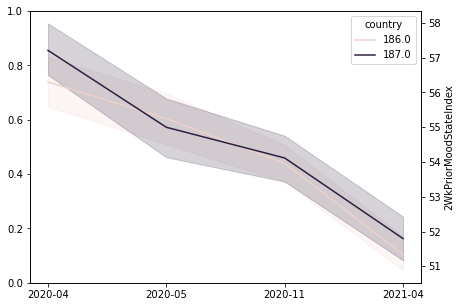

In [146]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
#sns.barplot(x='YearMonth', y='Value1', data=dataset, hue='Group',ax=ax1)
sns.lineplot(x='YearMonth',y='2WkPriorMoodStateIndex', data=combined_df, hue='country' )#marker='d',ax=ax2
plt.show()

In [147]:
df = combined_df[['2WkPriorMoodStateClass','YearMonth']]
# use groupby on df
dfg = combined_df.groupby(['YearMonth', 'country','2WkPriorMoodStateClass'])['ID'].count().reset_index()
dfg.head()

,YearMonth,country,2WkPriorMoodStateClass,ID
0,2020-04,186.0,Extremely Stressed,272
1,2020-04,186.0,Moderately Stressed,689
2,2020-04,186.0,Normal,477
3,2020-04,187.0,Extremely Stressed,320
4,2020-04,187.0,Moderately Stressed,687


<AxesSubplot:xlabel='YearMonth', ylabel='ID'>

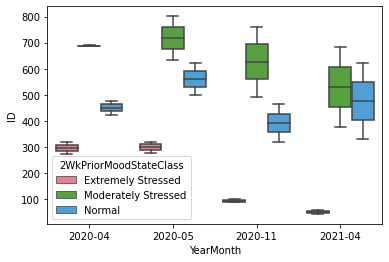

In [148]:
sns.boxplot(x="YearMonth", y="ID", hue="2WkPriorMoodStateClass", data=dfg, palette="husl")

- Covid Worry

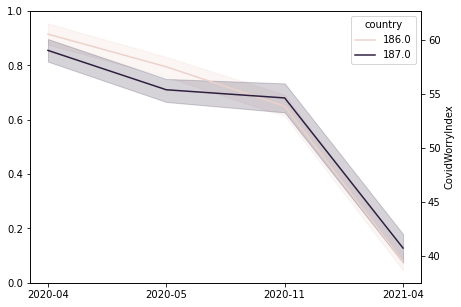

In [149]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
#sns.barplot(x='YearMonth', y='Value1', data=dataset, hue='Group',ax=ax1)
sns.lineplot(x='YearMonth',y='CovidWorryIndex', data=combined_df, hue='country' )#marker='d',ax=ax2
plt.show()

In [150]:
combined_df['CovidWorryIndex'].corr(combined_df['2WkPriorMoodStateIndex'])

0.5094262474757559

In [ ]:
df.groupby('Person').apply(
    lambda x: show_wordcloud(x.Response.tolist(), title=f"Person {x.name}")
)

In [172]:
### Is there any Significant difference between Adult parents and Adults (who are not parents)?

In [171]:
import scipy
import scipy.stats
from scipy.stats import kruskal

group1=combined_df.query('YearMonth=="2020-04" and isparent==1')['2WkPriorMoodStateIndex']
group2=combined_df.query('YearMonth=="2020-04" and isparent==0')['2WkPriorMoodStateIndex']
print(kruskal(group1, group2))

group3=combined_df.query('YearMonth=="2020-05" and isparent==0')['2WkPriorMoodStateIndex']
group4=combined_df.query('YearMonth=="2020-05" and isparent==1')['2WkPriorMoodStateIndex']
print(kruskal(group3, group4))

group5=combined_df.query('YearMonth=="2020-11" and isparent==0')['2WkPriorMoodStateIndex']
group6=combined_df.query('YearMonth=="2020-11" and isparent==1')['2WkPriorMoodStateIndex']
print(kruskal(group5, group6))

group7=combined_df.query('YearMonth=="2021-04" and isparent==0')['2WkPriorMoodStateIndex']
group8=combined_df.query('YearMonth=="2021-04" and isparent==1')['2WkPriorMoodStateIndex']
print(kruskal(group7, group8))
#It is significant only in April 2021

KruskalResult(statistic=0.07564072164784873, pvalue=0.7832942784556752)
KruskalResult(statistic=0.7514062011970943, pvalue=0.38603138404618)
KruskalResult(statistic=2.538433070539107, pvalue=0.11110499762934671)
KruskalResult(statistic=15.383058820874671, pvalue=8.777169855107179e-05)


<AxesSubplot:xlabel='isparent', ylabel='2WkPriorMoodStateIndex'>

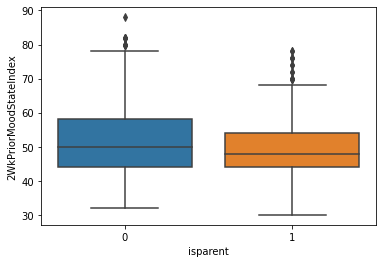

In [173]:
df=combined_df.query('YearMonth=="2021-04" and (isparent==0 or isparent==1)')
sns.boxplot(x="isparent", y="2WkPriorMoodStateIndex", data=df)

### Key Observations

In [ ]:
#1.Downward trend in Covid worry and emotions/mental stress from April 2020 to April 2021

#2.Covid worry and emotions/mental stress are positively correlated

#3.For Country=186, emotions/mental stress was overall less than Country=187

#4.For Country=186, covid worries was overall more than Country=187

#5.Top 5 factors that affected emotions and mental states:
#-In April 2020: Covid worries, 3 months prior emotion state, Life Changes, Mental Health and current Media use
#-In May 2020: Life Changes, Covid worries, in person conversation impact, current Media use and positive Changes
#-In November 2020: Life Changes, Covid worries, current Media use,in person conversation impact use and time spent outside
#-In April 2021, Life Changes, Covid worries, rooms in house and internet addiction
#As the covid worries are reducing, it's not the most important factor that affactes mental state

#7.Adults who are not parent seem to be more stressed in April 2021